### Higher Diploma in Science - Data Analytics 2020/21

### Fundamentals of Data Analysis Project

#### Prepared by: Fiona Lee 
#### Due Date - 8 January 2021


<BR>

### Fundamentals of Data Analysis - Project Instructions:

In  this  project  you  must  perform  and  explain  simple  linear  regression  using  Python on the power production dataset available on Moodle.  

The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, thefollowing items:

1.  Jupyter notebook that performs simple linear regression on the data set.
2.  In that notebook, an explanation of your regression and an analysis of its accuracy.
3.  Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. 

### Import Modules 
***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.metrics import r2_score 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

<BR>

### Import & Check the Dataset
***

#### Import the Dataset

In [2]:
df = pd.read_csv('Wind-Power.csv')
pd.set_option('max_colwidth',100)

#### Check if characters in the data imported are the same type

In [3]:
df.dtypes

speed    float64
power    float64
dtype: object

#### Check if there are any empty cells in the dataframe

In [4]:
pd.set_option("display.max_rows",500)# Option to display all entries
df.style.highlight_null(null_color='red'); #highlight any null values in red

#Option to print the dataset
#print(df.isnull())  

#Alternative method (https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values)
#df[pd.isnull(df).any(axis=1)]

#*Note not printed due to the size of the dateset.  No null values noted*

#### Check for corrupt data

In [5]:
print ("power shape = ",df.shape)

power shape =  (500, 2)


#### Re-name the columns from the original dataset

In [6]:
#Re-name the columns from the original dataset
df.rename(columns={'speed':'Speed_Mph'},inplace = True)
df.rename(columns={'power':'Power_KWph'},inplace = True)

<BR>

### Review the Data
***

#### Show the entire dataset sorted by 'Speed_Mph'

In [7]:
pd.set_option("display.max_rows", None)#Show the entire dataset
pd.set_option("display.precision", 3) #Round the results to 3 decimal places
df.sort_values(by =['Speed_Mph'], inplace=True, ascending=True)#Sort the dataset in ascending order
#https://datatofish.com/sort-pandas-dataframe/
df.style.set_properties(subset = ["Power KWph", "Speed Mph"], **{'text-align': 'center'})
#https://www.kite.com/python/answers/how-to-print-an-entire-pandas-dataframe-in-python
pd.set_option('expand_frame_repr', False) #print dataframe on a single line
#https://stackoverflow.com/questions/39482722/how-to-print-dataframe-on-single-line
#print((df[['Speed_Mph','Power_KWph','Power:Speed','Classification']]).head(10))

#### Option to Print the Dataset

In [8]:
df.head(5)

,Speed_Mph,Power_KWph
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


<BR>

### Add Classification Columns
***

#### Create a New Column called 'Power:Speed'

In [9]:
df['Power:Speed'] = (df ['Power_KWph'] / df ['Speed_Mph']) #Add Power/Speed Column
pd.set_option("display.precision", 3)
df.style.set_properties(subset=["Power_KWph", "Speed_Mph"], **{'text-align': 'centre'});
#https://www.codegrepper.com/code-examples/python/how+to+align+column+name+to+center+in+pandas+dataframe

#### Create a New Column called 'Optimum Ratio' based on the 'Power:Speed' Ratio

In [10]:
def Optimum(row):

    if row['Power:Speed'] ==0 and row['Speed_Mph'] > 8:
        return 'Assumed Out of Order'
    if row['Power:Speed'] ==0 and row['Speed_Mph'] < 8:
        return 'Zero Output - Low Wind Speed (< 8mph)'
    if row['Speed_Mph']== 0 and row['Power_KWph'] == 0:
        return 'Test'
    if row['Power:Speed'] > 0 and row['Power:Speed'] < 6 and row['Speed_Mph'] < 8:
        return 'Sub Optimum Power:Speed (< 6)' 
    if row['Power:Speed'] > 0 and row['Power:Speed'] < 6 and row['Speed_Mph'] >= 8:
        return 'Sub Optimum Power:Speed (< 6)'         
    if row['Power:Speed'] >= 6 and row['Power:Speed'] <= 8:
        return 'Optimum Output: Power:Speed (6-8)'     
    if row['Power:Speed'] > 8 and row['Speed_Mph'] < 8 :
        return 'Exceptional Output: Wind Speed ( > 8)'    
    if row['Power:Speed'] > 8 and row['Speed_Mph'] >= 8:
        return '> Optimum'             
    else:
        return 'null'


#### Populate the 'Optimum_Ratio' Column  

In [11]:
df['Classification'] = df.apply(lambda row: Optimum(row), axis=1) 

<BR>

### Summarise the Data
***

#### Show basic summary information

In [12]:
pd.set_option("display.precision", 1)
# https://realpython.com/pandas-groupby/
df.describe()

,Speed_Mph,Power_KWph,Power:Speed
count,500.0,500.0,499.0
mean,12.6,48.0,3.2
std,7.2,41.6,2.3
min,0.0,0.0,0.0
25%,6.3,5.3,1.1
50%,12.6,41.6,3.8
75%,18.8,93.5,4.9
max,25.0,113.6,13.9


#### Summarise the Data by Power:Speed Classification

In [13]:
df.style.set_properties(subset = ['Classification','Power_KWph'], **{'text-align': 'left'})
print(df[['Classification','Power_KWph']].groupby(['Classification']).count(),"\n")

                                       Power_KWph
Classification                                   
Assumed Out of Order                           14
Exceptional Output: Wind Speed ( > 8)          10
Optimum Output: Power:Speed (6-8)               2
Sub Optimum Power:Speed (< 6)                 439
Test                                            1
Zero Output - Low Wind Speed (< 8mph)          34 



<BR>

### Identify Trends & Remove Outliers:
***

#### Group Results by Power Output Value

In [14]:
print("")
pd.set_option("display.precision", 2)
# https://realpython.com/pandas-groupby/
df.style.set_properties(subset = ["Power_KWph", "Speed_Mph"], **{'text-align': 'center'});

#Option to print the analysis
#df.groupby(['Power_KWph']).agg(['count'])

#Note - Results not shown due to size - summary of findings below

#### Summary of Findings:

49 Samples had a 'Power Output' of Zero:

- 14 samples were identified as being 'outliers' i.e. where wind speed was in excess of 8 Mph and power output was zero.  These samples were removed as it can be assumed that the turbine was out of order.  These samples were classed as 'Assumed Out of Order'  

- 1 sample was removed where wind speed and power output were zero.  This was classed as a 'Test' and has been excluded.

- 34 samples were identified with zero power output at wind speeds less than 8mph.  It has been assumed that this is normal and should be part of the prediction model.

10 Results where Power: Speed Ratio was in excess of 8 at low wind speeds (<8 mph):

- These samples could be classed as further  possible 'outliers ' as they are exceptional results and potentially incorrect records.  Without further invesigation I decided not to exclude them for the purposes of this analysis.

#### Analysis of Results where Power Output equals Zero

In [15]:
df.sort_values(by=['Speed_Mph'], inplace=True, ascending=True)#Sort the dataset in descending order

#Option to print the dataset subset where Power_KWph = 0
df[df['Power_KWph'] == 0]


,Speed_Mph,Power_KWph,Power:Speed,Classification
0,0.00,0.0,NaN,Test
1,0.12,0.0,0.0,Zero Output - Low Wind Speed (< 8mph)
2,0.15,0.0,0.0,Zero Output - Low Wind Speed (< 8mph)
3,0.23,0.0,0.0,Zero Output - Low Wind Speed (< 8mph)
4,0.28,0.0,0.0,Zero Output - Low Wind Speed (< 8mph)
15,0.73,0.0,0.0,Zero Output - Low Wind Speed (< 8mph)
16,0.75,0.0,0.0,Zero Output - Low Wind Speed (< 8mph)
24,1.03,0.0,0.0,Zero Output - Low Wind Speed (< 8mph)
26,1.08,0.0,0.0,Zero Output - Low Wind Speed (< 8mph)
31,1.30,0.0,0.0,Zero Output - Low Wind Speed (< 8mph)


#### Analysis of Possible Outliers not Excluded

In [16]:
#df.loc[(df.Power:Speed > 0) & (df.Speed_Mph < 8)]
df.loc[(df.Power_KWph/df.Speed_Mph > 8) & (df.Speed_Mph < 8)]

,Speed_Mph,Power_KWph,Power:Speed,Classification
5,0.33,4.33,13.33,Exceptional Output: Wind Speed ( > 8)
6,0.40,5.19,12.96,Exceptional Output: Wind Speed ( > 8)
7,0.45,3.83,8.50,Exceptional Output: Wind Speed ( > 8)
9,0.53,5.55,10.56,Exceptional Output: Wind Speed ( > 8)
10,0.55,6.50,11.79,Exceptional Output: Wind Speed ( > 8)
11,0.58,5.24,9.10,Exceptional Output: Wind Speed ( > 8)
13,0.68,7.97,11.80,Exceptional Output: Wind Speed ( > 8)
14,0.70,9.75,13.90,Exceptional Output: Wind Speed ( > 8)
17,0.80,7.27,9.08,Exceptional Output: Wind Speed ( > 8)
19,0.85,7.35,8.64,Exceptional Output: Wind Speed ( > 8)


### Remove Outlier Data from the Dataframe
***

#### Remove Rows where Power_KWph = 0 and Speed_Mph > 8 or Speed_Mph = 0

In [17]:
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
Out_of_Order = df.loc[(df.Power_KWph == 0) & (df.Speed_Mph > 8)] # identify rows where true
df.drop(Out_of_Order.index, inplace=True)#Remove these rows from the existing dataset
Test = df.loc[(df.Power_KWph == 0) & (df.Speed_Mph == 0)] # identify rows where true
df.drop(Test.index, inplace=True) #Remove these rows from the existing dataset

<BR>

### Visualise the Data
***

#### Plot the Dataset excluding Outliers

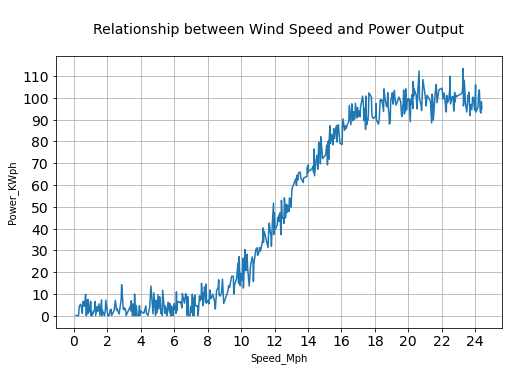

In [18]:
plt.figure(figsize = (8, 5)) 
plt.title('\nRelationship between Wind Speed and Power Output\n', fontsize = 14)
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26], size =14)
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120], size =14)
plt.grid(True)
plt.rcParams["axes.labelsize"] = 14
sns.lineplot (x=df.Speed_Mph,y=df.Power_KWph)
plt.show()

<BR>

#### Plot the Frequency of Speed and Power

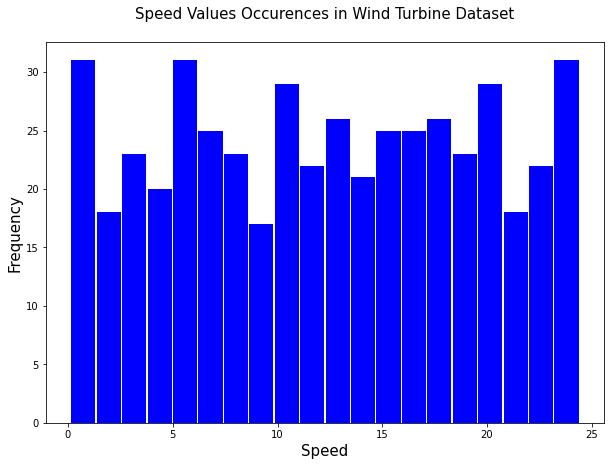

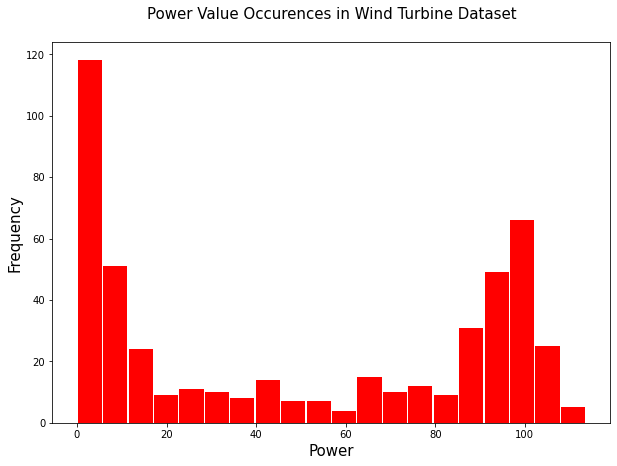

In [19]:
print ("")
plt.figure(figsize = (10, 7)) 
x = df ["Speed_Mph"] 
plt.hist(x, bins = 20, color = "blue", rwidth = 0.95) 
plt.title("Speed Values Occurences in Wind Turbine Dataset\n", fontsize = 15) 
plt.xlabel("Speed", fontsize = 15) 
plt.ylabel("Frequency", fontsize = 15) 
plt.show()
print ("")
plt.figure(figsize = (10, 7)) 
x = df ["Power_KWph"] 
plt.hist(x, bins = 20, color = "red", rwidth = 0.95) 
plt.title("Power Value Occurences in Wind Turbine Dataset\n", fontsize = 15) 
plt.xlabel("Power", fontsize = 15) 
plt.ylabel("Frequency", fontsize = 15) 
plt.show()

<BR>

#### Plot Speed and Power Results on the Same Axis


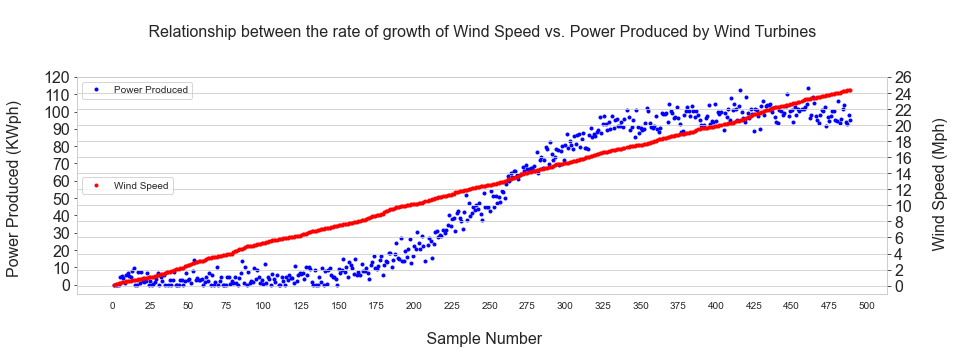

In [20]:
#https://stackoverflow.com/questions/11640243/pandas-plot-multiple-y-axes
print("")
plt.rcParams["axes.labelsize"] = 8
sns.set_style ("whitegrid")
fig, ax = plt.subplots()
rspine = ax.spines ['right']
rspine.set_position (('axes', 1))
ax.set_frame_on (True)
ax.patch.set_visible (True)
ax.grid(True)
fig.subplots_adjust(right = 2)
df.Power_KWph.plot(ax = ax, style = 'b.',label = "Power Produced")
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120],fontsize = 16)
ax.legend(loc = 0)
plt.xlabel("\n Sample Number",fontsize = 16)
plt.ylabel("Power Produced (KWph) \n",fontsize = 16)

# same ax as above since it's automatically added on the right
df.Speed_Mph.plot(ax = ax, style = 'r.', label = "Wind Speed", secondary_y = True)
plt.yticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26],fontsize = 16)
plt.xticks([0,25, 50,75, 100, 125, 150, 175, 200, 225, 250, 275,300,325,350,375,400,425,450,475,500],fontsize = 16)
plt.ylabel("\n Wind Speed (Mph)",fontsize = 16)
plt.title("\n Relationship between the rate of growth of Wind Speed vs. Power Produced by Wind Turbines \n\n" , fontsize = 16)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.legend (loc = "center left", frameon = True)
bbox_to_anchor=(10, 500)
plt.show()


<BR>

### Calculate Slope (m) and Co-efficient (c) Values
***

#### Polyfit Method

In [21]:
#https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

Polyfit = np.polyfit (df.Speed_Mph,df.Power_KWph,1)
print ('\nBest Fit Line Values:\n')
print ("- 'm' (slope) of 'Best Fit Line' is", round(Polyfit[0],6) )
print ("- 'c' (co-efficient) of 'Best Fit Line' is", round(Polyfit[1],6),"\n" )


Best Fit Line Values:

- 'm' (slope) of 'Best Fit Line' is 5.560605
- 'c' (co-efficient) of 'Best Fit Line' is -19.027483 



#### Alternative Manual Method

In [22]:
# First calculate the means of df2.Speed_Mph and df2.Power_KWph:
Speed_Avg = np.mean(df.Speed_Mph)
Power_Avg = np.mean(df.Power_KWph)

# Subtract means from df2.Speed_Mph and df2.Power_KWph:
Speed_Zero = df.Speed_Mph - Speed_Avg
Power_Zero = df.Power_KWph - Power_Avg

# The best m is found by the following calculation:
m = np.sum(Speed_Zero * Power_Zero) / np.sum(Speed_Zero * Speed_Zero)

# Use m from above to calculate the best c:
c = Power_Avg - m * Speed_Avg

print ('\nBest Fit Line Values:\n')
print ("- The slope of the 'Best Fit Line'(m)is",(round(m,6)))
print ("- The value of y when x = 0 of the 'Best Fit' Line (c) is",round(c,6),"\n")


Best Fit Line Values:

- The slope of the 'Best Fit Line'(m)is 5.560605
- The value of y when x = 0 of the 'Best Fit' Line (c) is -19.027483 



#### Fitting the Model - Trial Lines

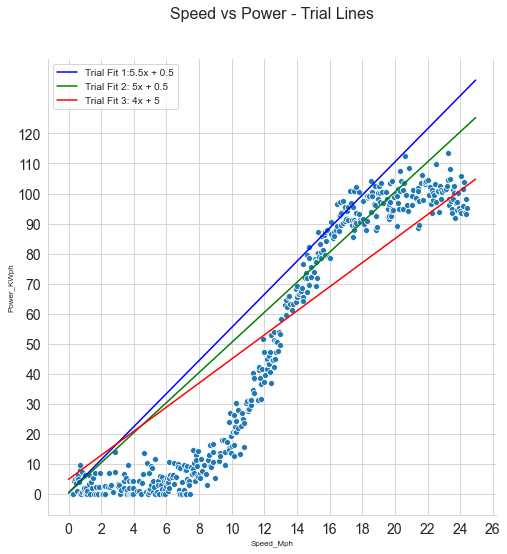

In [23]:
print ("")
plt.rcParams["figure.figsize"] = (28,24)
#plt.figure(figsize = (8, 6)) 
sns.set_style ("whitegrid")
#plt.plot (df2.Speed_Mph,df2.Power_KWph,'y.', label = r"Actual Data")
sns.relplot(x = "Speed_Mph", y = 'Power_KWph', palette="muted",height = 7, data=df)#use data including power outages
plt.title("Speed vs Power - Trial Lines\n\n", fontsize = 16)
plt.rcParams["axes.labelsize"] = 14
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26], fontsize = 14)
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120], fontsize = 14);

#Generate Trial Data to estimate the 'Best Fit Line'
x = np.arange (0.0,25.0,(1/len(df.Speed_Mph)*25))
plt.plot (x, 5.5 * x + 0.5, 'b-', label = r"Trial Fit 1:5.5x + 0.5")
plt.plot (x, 5 * x + 0.5, 'g-', label = r"Trial Fit 2: 5x + 0.5")
plt.plot (x, 4 * x + 5, 'r-', label = r"Trial Fit 3: 4x + 5")
plt.legend()
plt.show()

#### Fitting the Model - Best Fit Lines

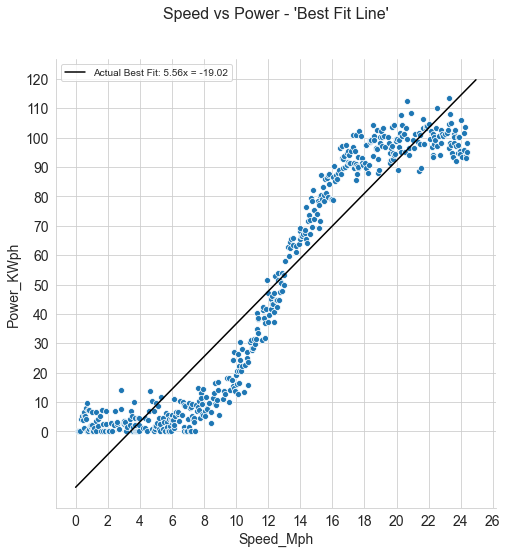

In [24]:
print ("")
plt.rcParams["figure.figsize"] = (28,24)
sns.set_style ("whitegrid")
sns.relplot(x = "Speed_Mph", y = 'Power_KWph', palette="muted",height = 7, data=df)#use data including power outages
plt.title("Speed vs Power - 'Best Fit Line'\n\n", fontsize = 16)
plt.rcParams["axes.labelsize"] = 14
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26], fontsize = 14)
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120], fontsize = 14);

#Use the Polyfit results to generate the 'Best Fit Line' 
y = Polyfit[0] * x + Polyfit[1]
plt.plot (x, y, 'k-', label = r"Actual Best Fit: 5.56x = -19.02")# Plot the best fit line over the data points.
plt.legend()
plt.show()

#### Alternative Method of Finding the 'Best Fit' Line -  Scatterplot with a Regression Line:

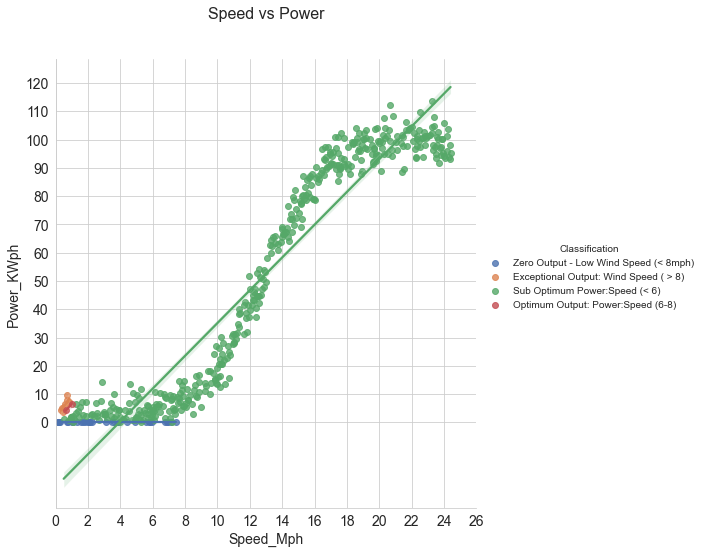

In [25]:
#print ("")
plt.rcParams["figure.figsize"] = (12,8);
plt.rcParams["axes.labelsize"] = 14
sns.set_style ("whitegrid");
sns.lmplot(x="Speed_Mph", y='Power_KWph', hue='Classification', palette="deep", height = 7 ,data=df);
plt.title("Speed vs Power\n\n", fontsize = 16);
plt.rcParams["axes.labelsize"] = 16;
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26], fontsize = 14);
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120], fontsize = 14);
plt.show()

<BR>

### Predict Expected Power based on a Given Speed
***

#### Using Numpy Poly1d Method

In [26]:
Predict = np.poly1d (Polyfit)
#https://data36.com/linear-regression-in-python-numpy-polyfit/

<BR>

#### Insert Value for 'P' (Speed) to Predict Power Output

In [27]:
#Input the Value of Speed (S) 

S = 6  #P (Wind Speed) is a variable to predict Power Output 

print ("\nThe Predicted Power Output for a Wind Speed of",S,"Mph is",round(Predict(S),2),"KWph\n")


The Predicted Power Output for a Wind Speed of 6 Mph is 14.34 KWph



#### Alternative Method - Manual method using Polyfit Results:

In [28]:
y = Polyfit [0] * S + Polyfit [1]
print ("\nThe Predicted Power Output for a Wind Speed of",S,"Mph is",round(y,2),"KWph\n")


The Predicted Power Output for a Wind Speed of 6 Mph is 14.34 KWph



<BR>

### Analyse the Accuracy of Trial and Best Fit Lines
***

#### Calculate the 'Cost' of Trial Fit Line

In [29]:
p = (np.array(df.Power_KWph))
s = (np.array(df.Speed_Mph))
pd.set_option("display.precision", 2) #Round the results to 2 decimal places

In [30]:
cost = lambda m,c: np.sum([(p[i] - m * s[i] - c)**2 for i in range(len(df.Speed_Mph))])

print("\nTrial Fit 1: Cost with m = %.1f and c = %.1f: %.0f" % (5.5, 0.5, cost(5.5, 0.5)))
print("Trial Fit 2: Cost with m = %.1f and c = %.1f: %.0f" % (5.0,  0.5, cost(5.0,  0.5)))
print("Trial Fit 3: Cost with m = %.1f and c = %.1f: %.0f" % (4.0, 5.0, cost(4.0, 5.0)),"\n")


Trial Fit 1: Cost with m = 5.5 and c = 0.5: 251772
Trial Fit 2: Cost with m = 5.0 and c = 0.5: 165448
Trial Fit 3: Cost with m = 4.0 and c = 5.0: 150678 



#### Calculate the 'Cost' of Best Fit Line

In [31]:
cost = lambda m,c: np.sum([(p[i] - Polyfit[0] * s[i] - Polyfit[1])**2 for i in range(len(df.Speed_Mph))])
print("\nBest Fit: Cost with m = %.2f and c = %.2f: %.0f" % (m, c, cost(m, c)),"\n")


Best Fit: Cost with m = 5.56 and c = -19.03: 80618 



In [32]:
#Alternative code using m & c as variables:
cost = lambda m,c: np.sum([(p[i] - m * s[i] - c)**2 for i in range(len(df.Speed_Mph))])
print("\nBest Fit: Cost with m = %.2f and c = %.2f: %.0f" % (m, c, cost(m, c)),"\n")


Best Fit: Cost with m = 5.56 and c = -19.03: 80618 



   *Conclusion: The 'Best Fit' line is the closest linear estimation of the dataset*

<BT>

#### Check Results & Create Cost Column in the Dataframe

In [33]:
#To create data for df['Cost']
Cost = ([(p[i] - m * s[i] - c)**2 for i in range(len(df.Speed_Mph))])

In [34]:
# Create a 'Cost Column to show Cost by Sample'
df['Cost'] = Cost
pd.set_option("display.precision", 3) #Round the results to 3 decimal places

In [35]:
print ("\nThe Cost of the Best fit is",((round(np.sum(df['Cost'])))),"\n")


The Cost of the Best fit is 80618.0 



#### Calculate the R2 Value of the Trial Fit Lines

In [36]:
#https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/
a = np.array(df.Power_KWph)

#Trial Fit Line 1:
b1 = np.array(5.5 * x + 0.5)
r2 = r2_score(a,b1)
print("\nThe R2 value of Trial Fit Line 1 is",(round(r2*100)),"%")

#Trial Fit Line 2:
b2 = np.array(5 * x + 0.5)
r2 = r2_score(a,b2)
print("The R2 value of Trial Fit Line 2 is",(round(r2*100)),"%")

#Trial Fit Line 3:
b3 = np.array(4 * x + 5)
r2 = r2_score(a,b3)
print("The R2 value of Trial Fit Line 3 is",(round(r2*100)),"%\n")


The R2 value of Trial Fit Line 1 is 68.0 %
The R2 value of Trial Fit Line 2 is 79.0 %
The R2 value of Trial Fit Line 3 is 82.0 %



#### Calculate the R2 Value of the Best Fit Lines

In [37]:
#Create and populate a new Column called 'Power Prediction'
df['Power_Prediction'] = Predict (df.Speed_Mph)
df.sort_values(by =['Speed_Mph'], inplace=True, ascending=True)#Sort the dataset in ascending order

In [38]:
#Option to view the dataset
df[['Speed_Mph','Power_KWph','Power_Prediction','Cost']].head(5)

,Speed_Mph,Power_KWph,Power_Prediction,Cost
1,0.125,0.000,-18.332,336.077
2,0.150,0.000,-18.193,331.000
3,0.225,0.000,-17.776,315.998
4,0.275,0.000,-17.498,306.191
5,0.325,4.331,-17.220,464.458


In [39]:
a = np.array(df.Power_KWph)
b = np.array(df.Power_Prediction)
r2 = r2_score(a,b) 
print("\nThe R2 value of Best Fit Line 3 is",(round(r2*100)),"%\n")


The R2 value of Best Fit Line 3 is 90.0 %



*Conclusion: The 'Best Fit' Line is the best approximation as it 'explains' 90% of points on the dataset*

<BR>

### Compare Simple Regression to Other Methods
***

In [40]:
#https://medium.com/towards-artificial-intelligence/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660#9a2b
#https://colab.research.google.com/drive/1WRdDbFFykiLv16-Vv-ghsregmfdbwtRX?usp=sharing&pli=1#scrollTo=3kbMmi6JYeB4

df2 = df.sample(n=int(len(df))) #Randomly sort the original dataset
num = int(len(df2)*.6) 
#https://datatofish.com/random-rows-pandas-dataframe/
train = df2[:num]#Use the first 60% of the dataset as a training set
test = df2[num:] #Use the remaining 40% of the dataset as a test set
print("Data",len(df))
print("Train",len(train))
print("Test",len(test))

Data 485
Train 291
Test 194


In [41]:
#Main function to find the mean & coefficients of line:

def simple_linear_regression(input_feature,output):
    
    Xi = input_feature
    Yi = output
    
    #Total number of data points:
    n = len(Xi)
    
    #X bar:
    Xi_mean = Xi.mean()
    
    #Y bar:
    Yi_mean = Yi.mean()
    
    #Sum of X:
    S_Xi = (Xi).sum()
    
    #Sum of Y:
    S_Yi = (Yi).sum()
    
    #Sum of (X*Y) multiplied by n:
    S_XiYi = ((Xi*Yi).sum())*n
    
    #Sum of X*Sum of Y:
    S_Xi_S_Yi = S_Xi*S_Yi
    
    #Sum of (X*X) multiplied by n:
    S_XiXi = ((Xi*Xi).sum())*n
    
    #Square of sum of X:
    S_Xi_Square = S_Xi*S_Xi
    
    #Slope:
    slope = (S_XiYi- S_Xi_S_Yi) / (S_XiXi-S_Xi_Square)
    
    #Intercept:
    intercept = Yi_mean - slope * Xi_mean
    
    return slope,intercept

In [42]:
#Apply df dataset to the function:

Input = np.array((df['Speed_Mph']))
Output = np.array((df['Power_KWph']))

Slope,Intercept = simple_linear_regression(Input,Output)

print ("\nSlope (m)of the Original Dataset  : " , Slope)
print ("Intercept (c) of the Original Dataset :",Intercept,"\n")


Slope (m)of the Original Dataset  :  5.560605310547432
Intercept (c) of the Original Dataset : -19.02748282150614 



In [43]:
#Training the model with train data:
#Finding the coefficients of best fit line:

actual_slope,actual_intercept = simple_linear_regression(train["Speed_Mph"],train["Power_KWph"])

print ("\nSlope of the Training dataset: " ,actual_slope)
print ("Intercept of the Training dataset: " ,actual_intercept,"\n")


Slope of the Training dataset:  5.551185443928042
Intercept of the Training dataset:  -18.294458338456245 



#### Plot the regression line with training data

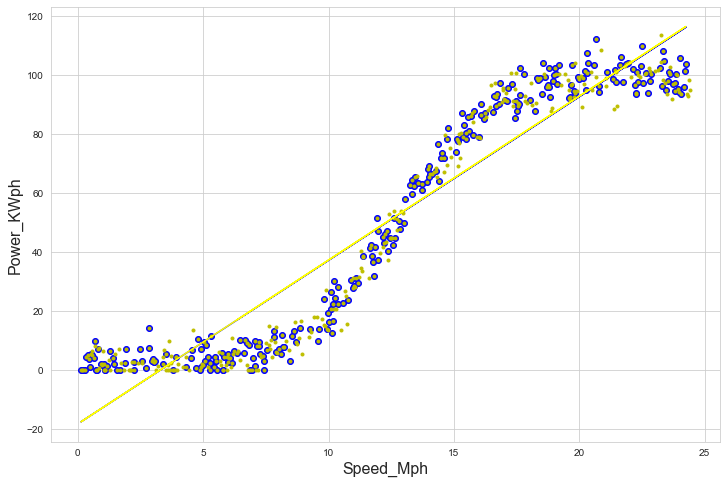

In [44]:
plt.rcParams["figure.figsize"] = (12,8)

plt.scatter(train["Speed_Mph"],train["Power_KWph"],color="blue")# Scatterplot the training data
plt.plot(train["Speed_Mph"],actual_slope*train["Speed_Mph"]+actual_intercept,color="blue")#Best fit line of the training data

plt.plot (df.Speed_Mph, df.Power_KWph, 'y.', label = r"Actual Best Fit: 5.56x = -19.02")# Plot the original data
plt.plot(train["Speed_Mph"],Slope * train["Speed_Mph"]+actual_intercept,color="yellow")#Best fit line of the original data

plt.xlabel("Speed_Mph")
plt.ylabel("Power_KWph")
plt.show()

#### Define the prediction function

In [45]:
def get_regression_prediction(input_features,slope,intercept):
    predicted_value = actual_slope*input_features + actual_intercept
    return predicted_value

#### Predicting values based on prediction function

In [46]:
Speed = 6

estimated_power = get_regression_prediction(Speed,actual_slope,actual_intercept)

print ("\nEstimated Power: ",round(estimated_power,2),"\n")


Estimated Power:  15.01 



#### Predicting values for the whole dataset

In [47]:
Power_Prediction = get_regression_prediction(df["Speed_Mph"],actual_slope,actual_intercept)

#Option to print the prediction
#print(Power_Prediction)

#### Plot the regression line for test data

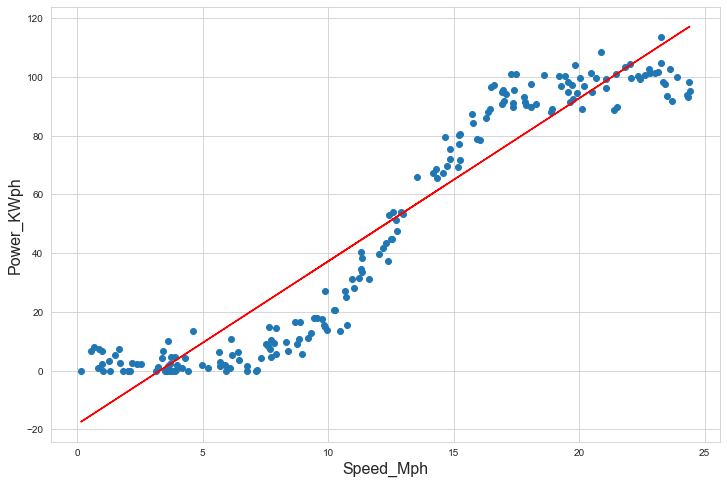

In [48]:
plt.scatter(test["Speed_Mph"],test["Power_KWph"])
plt.plot(test["Speed_Mph"],actual_slope*test["Speed_Mph"]+actual_intercept,color="red")
plt.xlabel("Speed_Mph")
plt.ylabel("Power_KWph")
plt.show()

### Using Sklearn package to Model the Data 
***

In [49]:
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
#https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

X = df[['Speed_Mph']]
Y = df['Power_KWph']

regr = linear_model.LinearRegression()
train_x = np.array(train[['Speed_Mph']])
train_y = np.array(train['Power_KWph'])
regr.fit(train_x,train_y)
test_x = np.array(test[['Speed_Mph']])
test_y = np.array(test['Power_KWph'])

#### Print the Coefficient Values

In [50]:
coeff_data = pd.DataFrame(regr.coef_ , X.columns , columns=["Coefficients"])
coeff_data

,Coefficients
Speed_Mph,5.551


#### Predict the Data

In [51]:
Y_pred = regr.predict(test_x)

#### Check the Accuracy

In [52]:
# Check accuracy:
from sklearn.metrics import r2_score
R = r2_score(test_y , Y_pred)
#print ("R² :",R)
print("\nThe R2 value of Best Fit Line 3 is",(round(R*100)),"%\n")


The R2 value of Best Fit Line 3 is 90.0 %



### References
***

https://realpython.com/linear-regression-in-python/

https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86

https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/

https://datatofish.com/sort-pandas-dataframe/

https://www.kite.com/python/answers/how-to-print-an-entire-pandas-dataframe-in-python

https://www.codegrepper.com/code-examples/python/how+to+align+column+name+to+center+in+pandas+dataframe

https://www.dataquest.io/blog/settingwithcopywarning/

https://realpython.com/pandas-groupby/

https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/

https://medium.com/towards-artificial-intelligence/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660#9a2b

https://colab.research.google.com/drive/1WRdDbFFykiLv16-Vv-ghsregmfdbwtRX?usp=sharing&pli=1#scrollTo=3kbMmi6JYeB4

https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

https://datatofish.com/random-rows-pandas-dataframe/

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

https://contactsunny.medium.com/linear-regression-in-python-using-scikit-learn-f0f7b125a204

https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

# End